In [210]:
# %matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re, seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import re, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import random
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [211]:
data = pd.read_csv("./analysis/guided_backprop_75_eigenbasis_7_centering_0.75_adni_ad_mci.csv")

['Volume' 'Cortical Thickness Average' 'Surface Area']


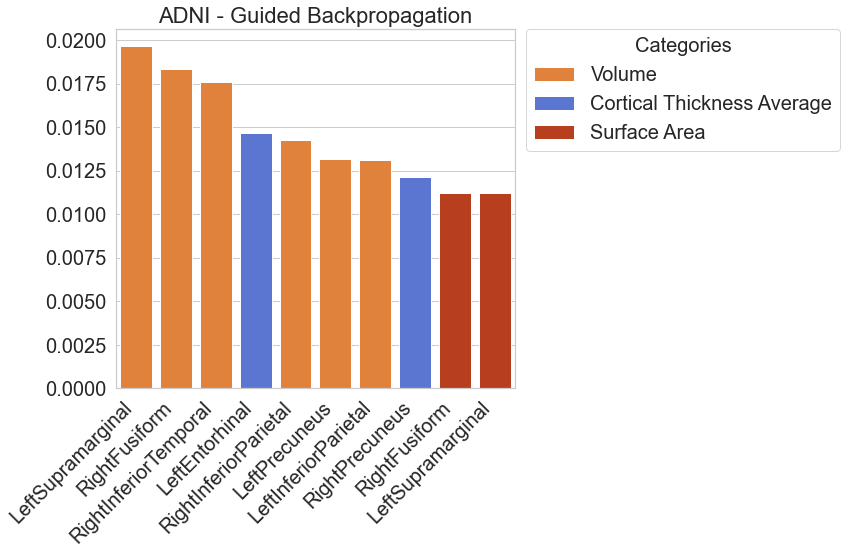

In [212]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4, style="whitegrid")

# Loading the categories data
categories_file_path = 'adni_categories.csv'
categories_data = pd.read_csv(categories_file_path)

# Load the name mapping CSV file
mapping_file_path = 'adni_name_dictionary.csv'
name_mapping_df = pd.read_csv(mapping_file_path)
name_mapping = dict(zip(name_mapping_df.iloc[:, 0], name_mapping_df.iloc[:, 1]))

# Specific color mapping for categories
category_color_mapping = {
    'Cortical Thickness Standard Deviation': (0.15844, 0.73551, 0.92305),
    'Surface Area': (0.81608, 0.18462, 0.01809),
    'Cortical Thickness Average': (0.27628, 0.42118, 0.89123),
    'Volume': (0.9836, 0.49291, 0.12849),
    'Hippocampal Subfields Volume': '#21918c',
    'Non-imaging': (0.98999, 0.23356, 0.64362)
}

# category_color_mapping = {
#     'Personality': (0.15844, 0.73551, 0.92305),
#     'Life': (0.81608, 0.18462, 0.01809),
#     'Neuropsych': (0.27628, 0.42118, 0.89123),
#     'Demographics': (0.9836, 0.49291, 0.12849),
#     'Support': '#21918c',
#     'Sleep': (0.93301, 0.81236, 0.22667),
#     'Imaging': (0.64362, 0.98999, 0.23356),
#     'Substance Use': (0.64362, 0.23356, 0.98999),
#     'BRIEF': (0.98999, 0.23356, 0.64362),
#     'Depressive Symptoms': (0.64362, 0.7, 0.23356)
# }

# Creating a dictionary to map features to categories
feature_to_category_mapping = {}
for category_name, features in categories_data.iteritems():
    for feature in features.dropna():
        feature_to_category_mapping[feature] = category_name

# Selecting top 15 features
original_top_15_features = data.nlargest(10, columns='0')

# Adding the category column using the original feature names
original_top_15_features['category'] = original_top_15_features['index'].map(feature_to_category_mapping)
# Mapping the category colors for the top 15 features
print(original_top_15_features['category'].unique())
mapped_colors = [category_color_mapping[category] for category in original_top_15_features['category'].unique()]

# Creating the barplot with original feature names, categories, dodge=False, and viridis color palette
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='index', y='0', hue='category', data=original_top_15_features, palette=mapped_colors, dodge=False)

# Customizing the plot
plot.set_xlabel("", fontsize=20)
plot.set_ylabel("", fontsize=20)
# plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

# Get current x-axis labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]

# Replace labels with alternative names using the mapping
new_labels = [name_mapping.get(label, label) for label in labels]

# Set new x-axis labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45, ha="right", fontsize=20)

# Adding the legend outside the plot to the right
plt.legend(title='Categories', title_fontsize='20', fontsize='20', bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)

plt.title("ADNI - Guided Backpropagation", fontsize=22)
plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots/guided_backpropagation_adni_top_10_features_ad_mci_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()


Index(['Unnamed: 0', 'subject', 'weight_val'], dtype='object')
   PTGENDER  AGE_visit  APOE4
0         1      81.30      1
1         1      67.50      0
2         0      80.40      0
3         1      75.40      1
4         0      74.39      1


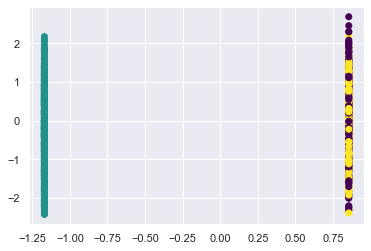

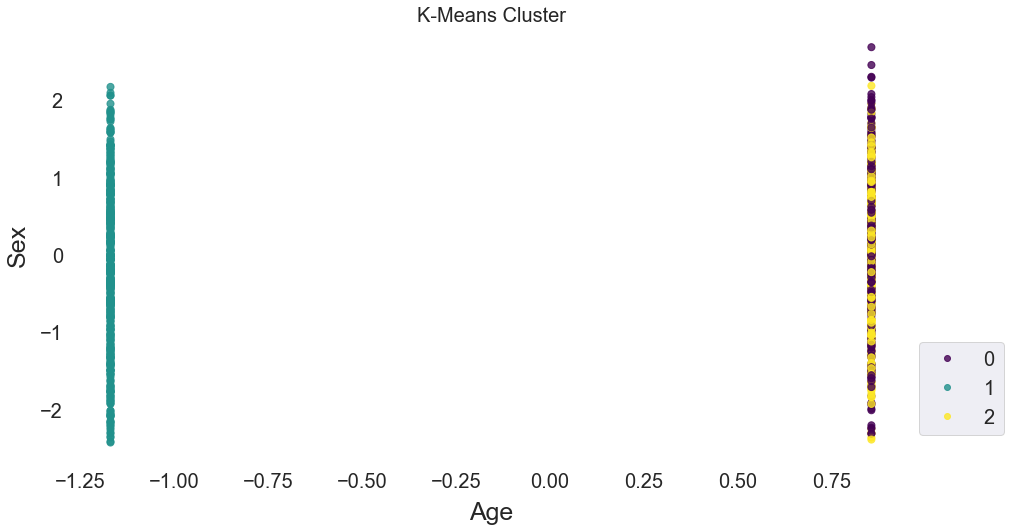

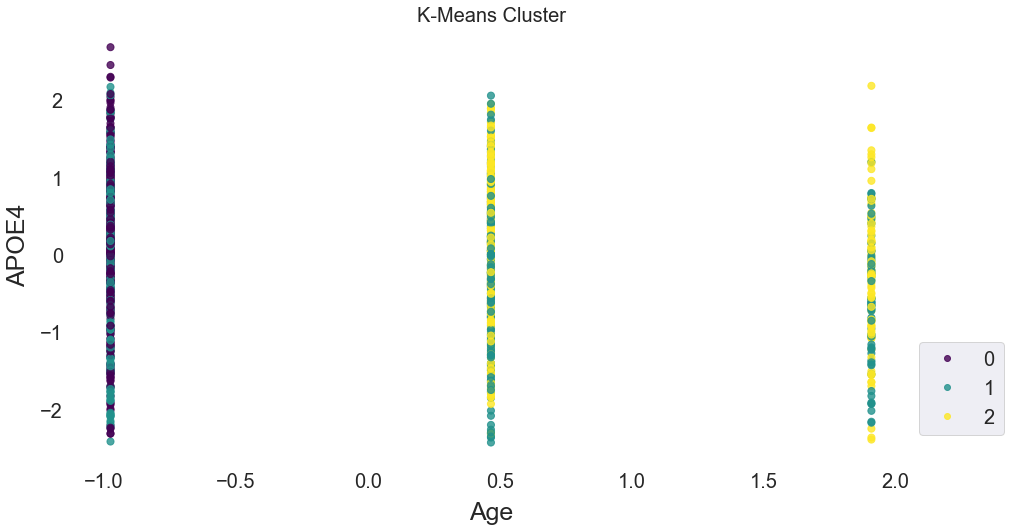

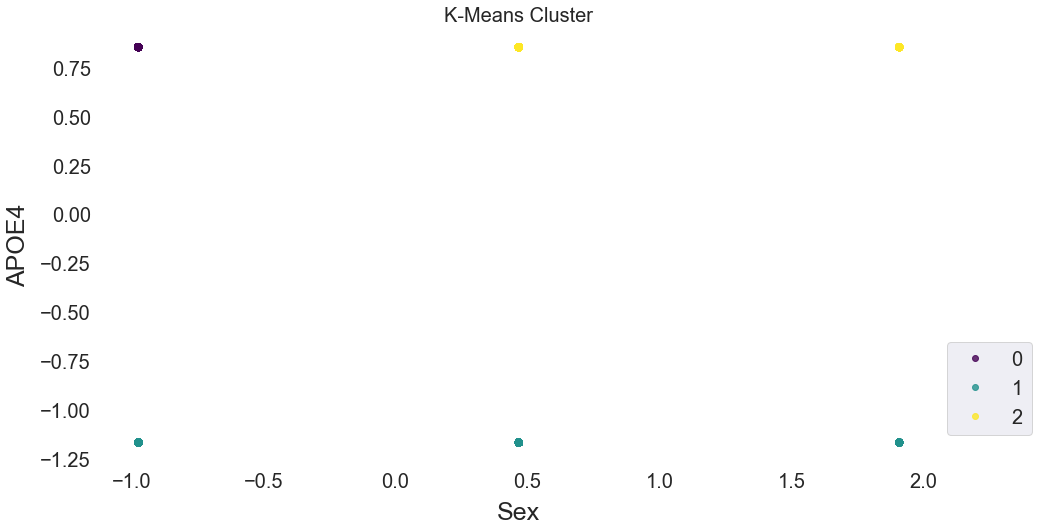

<Figure size 432x288 with 0 Axes>

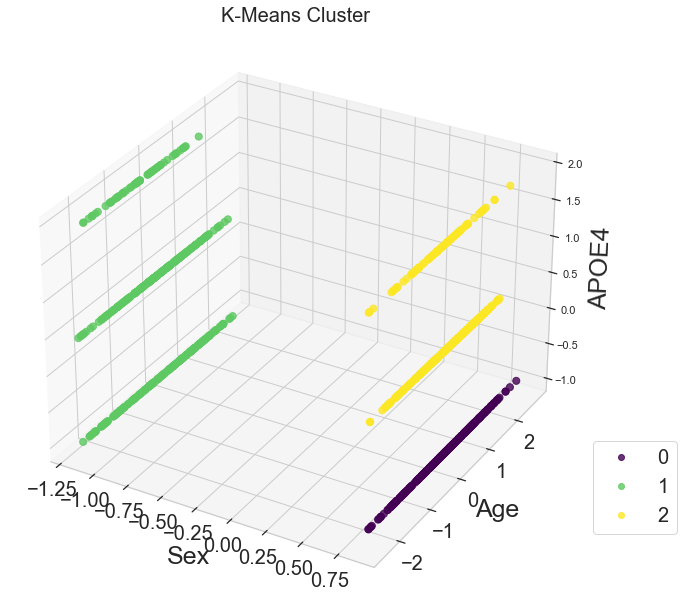

In [213]:
import random

sns.set_style("whitegrid")
sns.set()

# Setting the seed
run_with_seed = 1964
# np.random.seed(run_with_seed)
random.seed(run_with_seed)

input_data = pd.read_csv("./analysis/weight_val_knn_75_eigenbasis_7_centering_0.75_adni_ad_mci.csv")

input_data = input_data[input_data["subject"] != 6598]

print(input_data.columns)

input_data_feats = pd.read_csv("graph_factors_raw_adni_ad_mci.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')
input_data_feats['PTGENDER'] = input_data_feats.PTGENDER.map({'Female':0, 'Male':1})

input_data_preds = pd.read_csv("./analysis/weights_pred_knn_75_eigenbasis_7_centering_0.75_adni_ad_mci.csv")
input_data_preds = input_data_preds[['subject', 'Labels', 'Prediction']]

bin_labels_5 = [0, 1, 2]

input_data['binned'] = pd.qcut(input_data['weight_val'], q=[0, .33, .66, .99], labels=bin_labels_5)

merged = pd.merge(input_data, input_data_feats, on='subject')

merged_with_preds = pd.merge(merged, input_data_preds, on='subject')

# Assuming 'df' is your DataFrame and 'ID', 'feature1', 'feature2', 'feature3' are your columns.
# We first separate the ID column and the feature columns.
df = merged_with_preds.copy()

df_features = merged_with_preds[['PTGENDER', 'AGE_visit', 'APOE4']]

print(df_features.head(5))

# Merge the two dataframes on the subject ID
# merged_data = pd.merge(df, input_data_raw, left_on='subject', right_on='subject')

df_id = df['subject']

# Standardize the feature matrix
x = StandardScaler().fit_transform(df_features)

# Create a KMeans instance with 3 clusters: change this if you want more or fewer clusters.
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(x)

# Get the cluster assignments
labels = kmeans.labels_

# Create a DataFrame aligning labels and features
df_clustered = pd.DataFrame(x, columns=['PTGENDER_x', 'AGE_visit', 'APOE4'])
df_clustered['Cluster'] = labels

# Get the cluster assignments
labels = kmeans.labels_

# Include the subject ID to df_clustered
df_clustered['subject'] = df_id.values

# Save to csv
df_clustered.to_csv('clustered_adni_ad_mci_75_0.75_7.csv', index=False)

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(df_clustered['PTGENDER_x'], df_clustered['AGE_visit'], c=labels, cmap='viridis')

plt.show()

# tipi_etv
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['PTGENDER_x'], df_clustered['AGE_visit'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('Sex', fontsize=25, labelpad=10)
ax.set_xlabel('Age', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()

# cluster based on family alc history
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['APOE4'], df_clustered['AGE_visit'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('APOE4', fontsize=25, labelpad=10)
ax.set_xlabel('Age', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


# cluster based on family alc history
fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(df_clustered['APOE4'], df_clustered['PTGENDER_x'], 
                s=50, c=labels, marker='o', cmap="viridis", alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_ylabel('APOE4', fontsize=25, labelpad=10)
ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


# axes instance
plt.clf()
sns.set_style("whitegrid")
# sns.set()
fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154

colors=['#440154','#3b528b','#5ec962','#21918c','#fde725']

cmap = mcolors.ListedColormap(colors)

sc = ax.scatter(df_clustered['PTGENDER_x'], df_clustered['AGE_visit'], df_clustered['APOE4'], s=50, c=labels, marker='o', cmap=cmap, alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)


ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_ylabel('Age', fontsize=25, labelpad=10)
ax.set_zlabel('APOE4', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-Means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# legend
plt.show()


In [215]:
input_data_preds = pd.read_csv("./clustered_adni_ad_mci_75_0.75_7.csv")
input_data_raw = pd.read_csv("./graph_factors_raw_adni_ad_mci.csv")

# Merge the two dataframes on the subject ID
merged_data = pd.merge(input_data_preds, input_data_raw, left_on='subject', right_on='subject')

input_data_preds = pd.read_csv("./analysis/weights_pred_knn_75_eigenbasis_7_centering_0.75_adni_ad_mci.csv")
input_data_preds = input_data_preds[['subject', 'Labels', 'Prediction']]

merged_data = pd.merge(input_data_preds, merged_data, left_on='subject', right_on='subject')

input_data_weight = pd.read_csv("./analysis/weight_val_knn_75_eigenbasis_7_centering_0.75_adni_ad_mci.csv")
input_data_weight = input_data_weight[['subject', 'weight_val']]

merged_data = pd.merge(input_data_weight, merged_data, left_on='subject', right_on='subject')

# Save the merged dataframe to a new csv file
merged_data.to_csv('merged_data_adni_for_plots_75_0.75_7.csv', index=False)

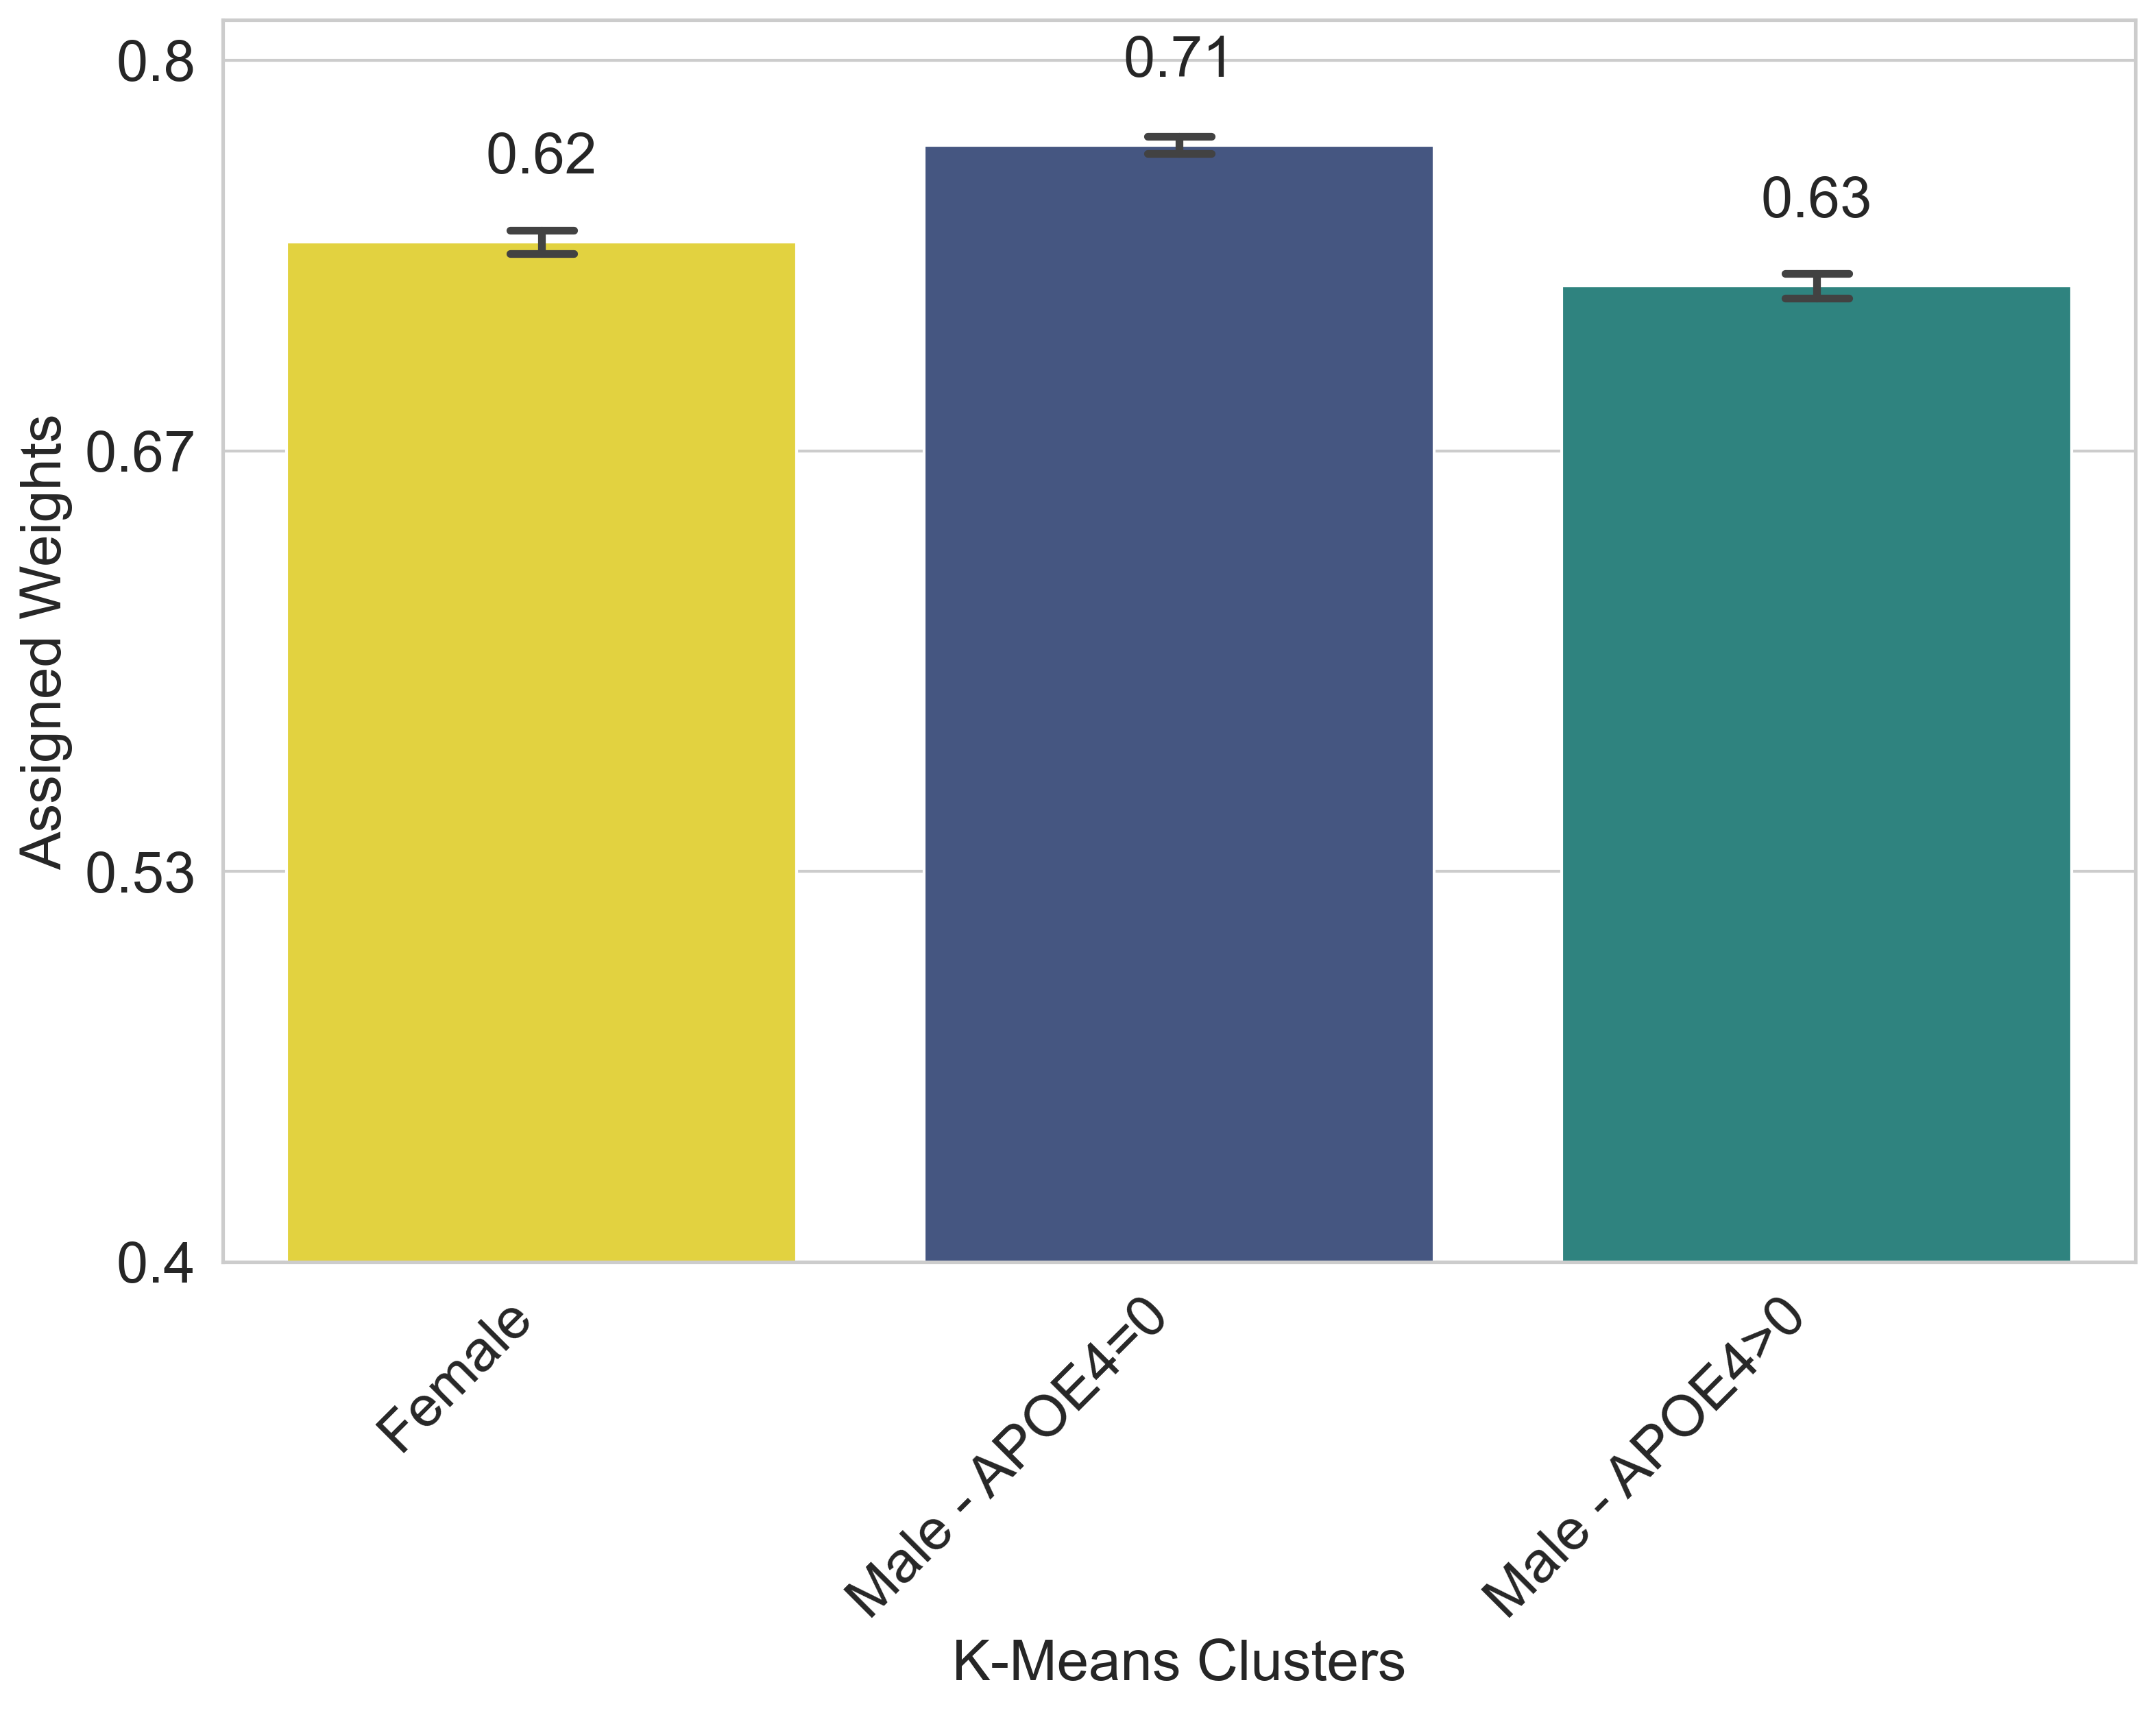

In [216]:
# K-means clustering boxplot!!!

df = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

df['binned'] = pd.qcut(df['weight_val'], q=[0, .33, .66, .99], labels=bin_labels_5)

# Set the font scale and style
sns.set(font_scale=1.4, style="whitegrid")

# Calculate the balanced accuracy for each cluster
balanced_accuracy = df.groupby('Cluster').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['Cluster', 'balanced_accuracy']

# Merge the balanced accuracy with the original DataFrame
df = pd.merge(df, balanced_accuracy, how='left', on='Cluster')

# Create the bar plot again with standard deviation bars
plt.figure(figsize=(12, 8), dpi=300)
# colors = sns.color_palette("viridis", 5)
# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154
colors = ['#fde725', '#3b528b', '#21918c']
ax = sns.barplot(x="Cluster", y="weight_val", data=df, palette=colors, order=[0,1,2], capsize=.1)

# Add the balanced accuracy as text at a fixed height above the bars
# We need to reorder the balanced_accuracy dataframe according to the new order
balanced_accuracy = balanced_accuracy.set_index('Cluster').loc[[0, 1, 2]].reset_index()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.023,
            '{:1.2f}'.format(balanced_accuracy['balanced_accuracy'][i]),
            ha="center", fontsize = 20)

# Set the title and labels
ax.set_xlabel('K-Means Clusters', fontsize=20)
ax.set_ylabel('Assigned Weights', fontsize=20)

# Set the lower limit of y-axis
ax.set_ylim(bottom=0.70)

# Rename the x-axis labels
new_labels = ["Female", "Male - APOE4=0", "Male - APOE4>0"] 
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)

# Set y-axis to have 5 ticks from 0.4 to max value
y_ticks = np.round(np.linspace(0.4, 0.8, 4), decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

# Saving the updated plot
modern_plot_path = './plots/grouped_weight_bacc_kmeans_adni_ad_mci__75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()


<Figure size 432x288 with 0 Axes>

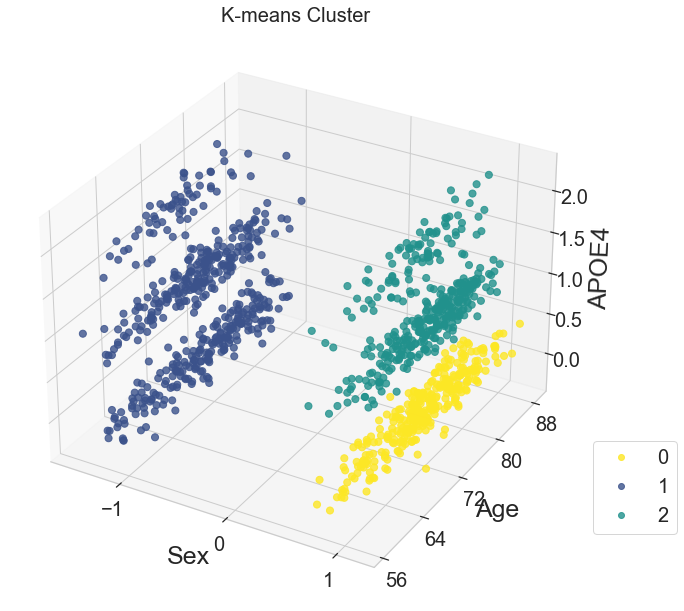

In [217]:
# axes instance
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

plt.clf()
sns.set_style("whitegrid")
# sns.set()
fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

df = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

# No age available
df = df[df["subject"] != 6598]

# Add random Gaussian noise to the specific column
mean, std_dev = 0, 0.1 # Set your mean and standard deviation
df['demo_sex_x_bef'] = df['PTGENDER_x'].copy()
df['APOE4_y_bef'] = df['APOE4_y'].copy()

np.random.seed = 42
df['PTGENDER_x'] += np.random.normal(mean, std_dev, size=df['PTGENDER_x'].shape)
df['APOE4_y'] += np.random.normal(mean, std_dev, size=df['APOE4_y'].shape)

bin_labels_5 = [0, 1, 2]

df['binned'] = pd.qcut(df['weight_val'], q=[0, .33, .66, .99], labels=bin_labels_5)

# To plot the scatterplot with the learned weight
# labels = df['binned_matched_clusters']

# To plot the scatterplot with the assigned cluster
labels = df['Cluster']

# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154

colors = ['#fde725', '#3b528b', '#21918c'] #'#440154', '#5ec962'

cmap = mcolors.ListedColormap(colors)

sc = ax.scatter(df['PTGENDER_x'], df['AGE_visit_y'], df['APOE4_y'], s=50, c=labels, marker='o', cmap=cmap, alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)

ax.set_ylim((55,90))

ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_ylabel('Age', fontsize=25, labelpad=10)
ax.set_zlabel('APOE4', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('K-means Cluster',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase z-axis tick font size
for t in ax.zaxis.get_major_ticks():
    t.label.set_fontsize(20)
    
# Set the number of ticks for each axis
ax.xaxis.set_major_locator(mticker.MaxNLocator(3))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))
ax.zaxis.set_major_locator(mticker.MaxNLocator(7))

# Saving the updated plot
modern_plot_path = './plots/scatterplot_kmeans_adni_ad_mci_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)

# legend
plt.show()

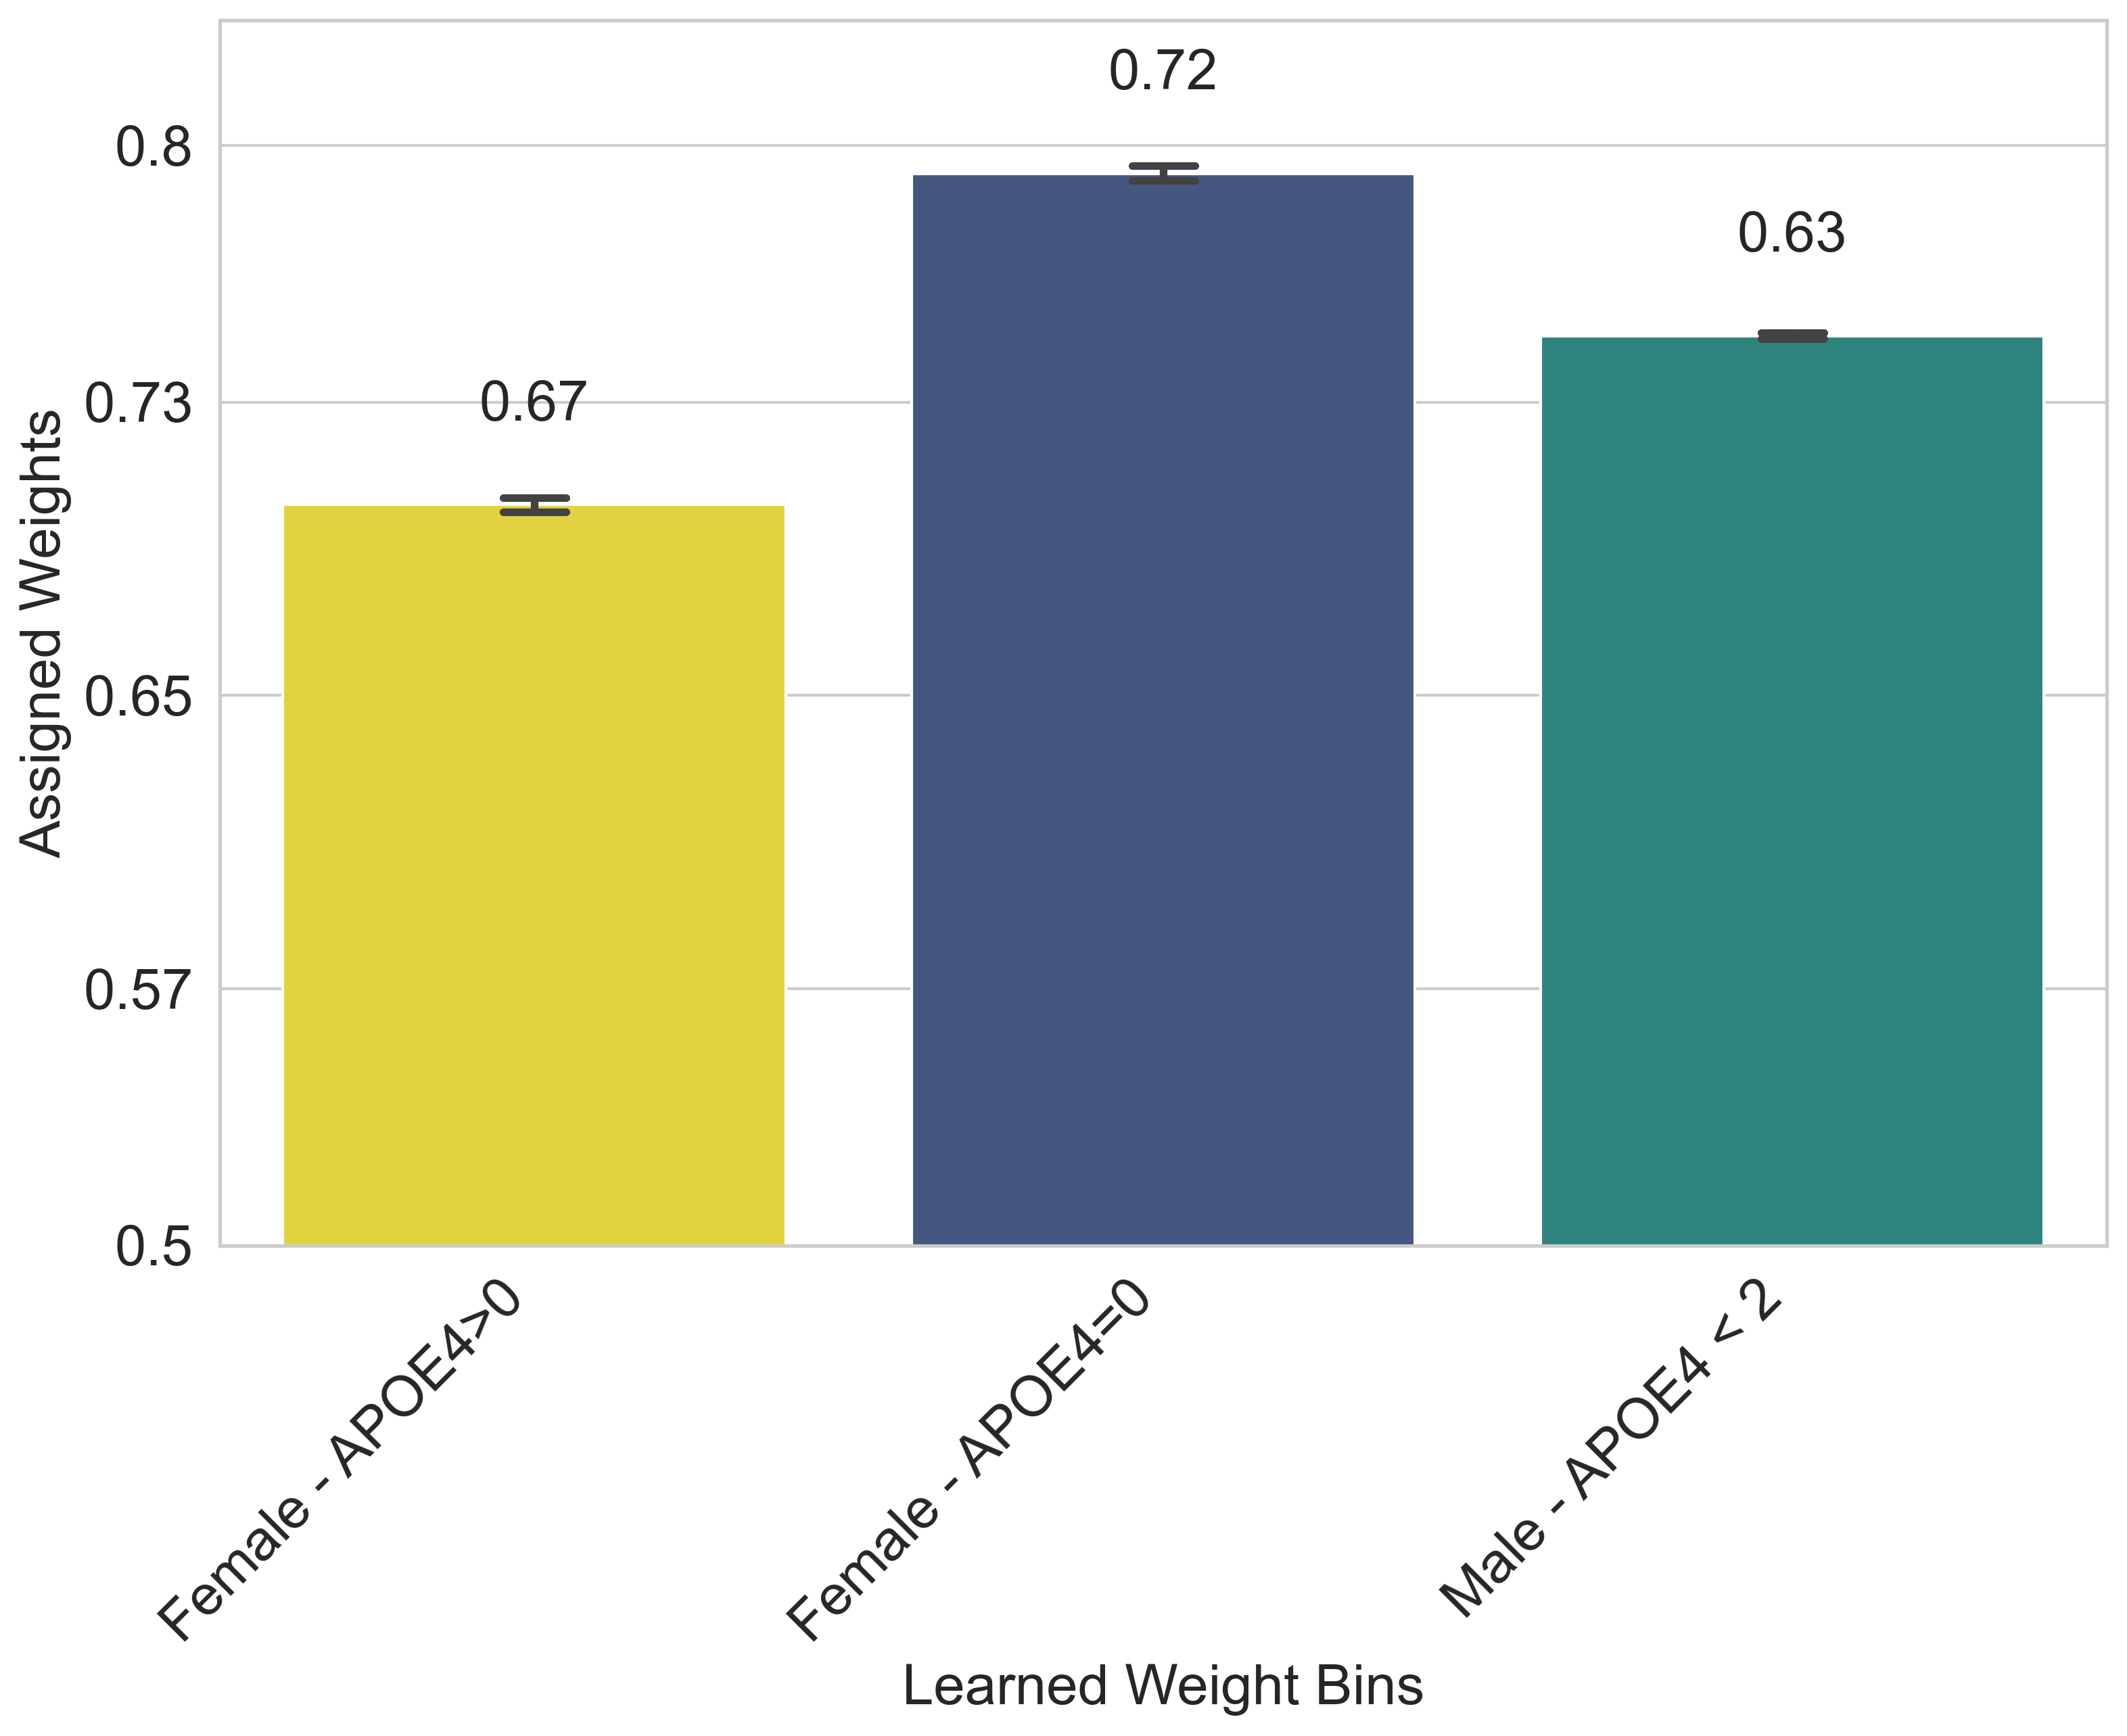

In [218]:
# Binned weights - BACC boxplot

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score

df = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

df['binned'] = pd.qcut(df['weight_val'], q=[0, .33, .66, .99], labels=bin_labels_5)

# Match the learned weight clusters with the kmeans clusters for better color comparison
# mapping = {4: 2, 3: 3, 2: 1, 1: 0, 0: 4}

mapping = {0: 0, 1: 2, 2: 1}

df['binned_matched_clusters'] = df['binned'].map(mapping)

# Set the font scale and style
sns.set(font_scale=1.4, style="whitegrid")

# Calculate the balanced accuracy for each cluster
balanced_accuracy = df.groupby('binned_matched_clusters').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['binned_matched_clusters', 'balanced_accuracy']

# Merge the balanced accuracy with the original DataFrame
df = pd.merge(df, balanced_accuracy, how='left', on='binned_matched_clusters')

# Create the bar plot again with standard deviation bars
plt.figure(figsize=(12, 8), dpi=300)
# colors = sns.color_palette("viridis", 5)
# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154
colors = ['#fde725', '#3b528b', '#21918c']
ax = sns.barplot(x="binned_matched_clusters", y="weight_val", data=df, palette=colors, order=[0,1,2], capsize=.1)

# Add the balanced accuracy as text at a fixed height above the bars
# We need to reorder the balanced_accuracy dataframe according to the new order
balanced_accuracy = balanced_accuracy.set_index('binned_matched_clusters').loc[[0, 1, 2]].reset_index()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.023,
            '{:1.2f}'.format(balanced_accuracy['balanced_accuracy'][i]),
            ha="center", fontsize = 20)

# Set the title and labels
ax.set_xlabel('Learned Weight Bins', fontsize=20)
ax.set_ylabel('Assigned Weights', fontsize=20)

# Set the lower limit of y-axis
ax.set_ylim(bottom=0.70)

# Rename the x-axis labels
new_labels = ["Female - APOE4>0", "Female - APOE4=0", "Male - APOE4 < 2"] 
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)

# Set y-axis to have 5 ticks from 0.4 to max value
y_ticks = np.round(np.linspace(0.5, 0.8, 5), decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

# Saving the updated plot
modern_plot_path = './plots/grouped_weight_bacc_binned_weights_adni_ad_mci_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()



(1191, 11)


<Figure size 432x288 with 0 Axes>

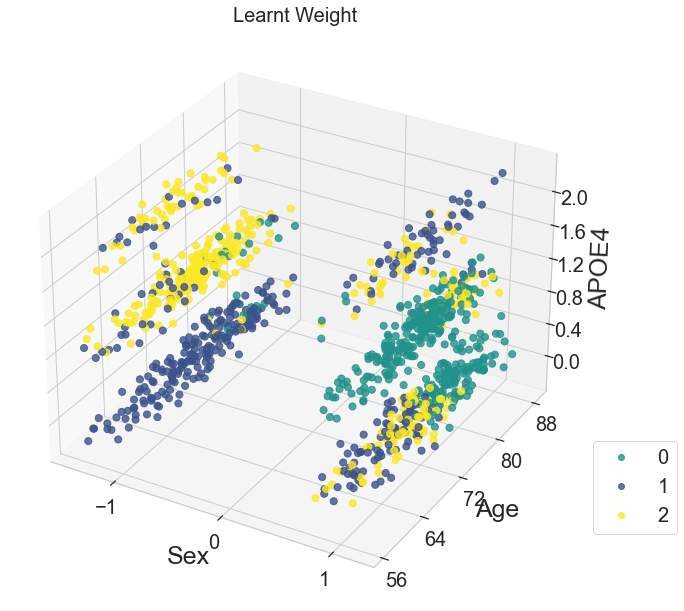

In [219]:
# axes instance
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

plt.clf()
sns.set_style("whitegrid")
# sns.set()
fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

df = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

# No age available
df = df[df["subject"] != 6598]

# Do the plot for only one disease
# df = df[df["Labels"] == 0]

print(df.shape)
# Add random Gaussian noise to the specific column
mean, std_dev = 0, 0.1 # Set your mean and standard deviation
df['demo_sex_x_bef'] = df['PTGENDER_x'].copy()
df['APOE4_y_bef'] = df['APOE4_y'].copy()

np.random.seed = 42
df['PTGENDER_x'] += np.random.normal(mean, std_dev, size=df['PTGENDER_x'].shape)
df['APOE4_y'] += np.random.normal(mean, std_dev, size=df['APOE4_y'].shape)

bin_labels_5 = [0, 1, 2]

# bin_labels_5 = [0, 1, 2, 3, 4]

df['binned'] = pd.qcut(df['weight_val'], q=[0, .33, .66, .99], labels=bin_labels_5)

# df['binned'] = pd.qcut(df['weight_val'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)

# Match the learned weight clusters with the kmeans clusters for better color comparison
# mapping = {4: 2, 3: 3, 2: 1, 1: 0, 0: 4}

mapping = {0: 0, 1: 2, 2: 1}


df['binned_matched_clusters'] = df['binned'].map(mapping)

# To plot the scatterplot with the learned weight
labels = df['binned_matched_clusters']

# To plot the scatterplot with the assigned cluster
# labels = df['binned']

# yellow --> #fde725
# light green --> #5ec962
# teal --> #21918c
# blue --> #3b528b
# dark blue --> #440154

# colors = ['#21918c', '#3b528b', '#fde725', '#440154', '#5ec962']

colors = ['#21918c', '#3b528b', '#fde725']

cmap = mcolors.ListedColormap(colors)

sc = ax.scatter(df['PTGENDER_x'], df['AGE_visit_y'], df['APOE4_y'], s=50, c=labels, marker='o', cmap=cmap, alpha=0.8)

ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.0, 0.3), loc=2, fontsize=20)

ax.set_ylim((55,90))

ax.set_xlabel('Sex', fontsize=25, labelpad=10)
ax.set_ylabel('Age', fontsize=25, labelpad=10)
ax.set_zlabel('APOE4', fontsize=25, labelpad=10)
ax.set_facecolor('white') 
plt.title('Learnt Weight',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Increase z-axis tick font size
for t in ax.zaxis.get_major_ticks():
    t.label.set_fontsize(20)
    
# Set the number of ticks for each axis
ax.xaxis.set_major_locator(mticker.MaxNLocator(3))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))
ax.zaxis.set_major_locator(mticker.MaxNLocator(7))

# Saving the updated plot
modern_plot_path = './plots/scatterplot_learned_weight_adni_ad_mci_3_bins_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)

# legend
plt.show()

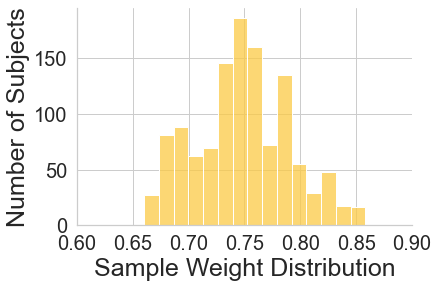

In [220]:
input_data = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")
c = input_data['weight_val']
plt.clf()
plt.xlim(0.6, 0.9) # edit accordingly
sns.set(font_scale=1.4, style="whitegrid")

sns.despine(left=False) #plum, navajowhite, skyblue https://matplotlib.org/stable/gallery/color/named_colors.html
ax = sns.histplot(data=c, bins=15, color='#fcca46')
plt.ylabel("Number of Subjects", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Sample Weight Distribution", fontsize=25)

# Saving the updated plot
modern_plot_path = './plots/histogram_weights_adni_ad_mci_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()

T-test: 4.438386246867897e-47
Mann-whitney: 1.6928846438531867e-39
   APOE4_y  balanced_accuracy
0        0           0.671665
1        1           0.672417
2        2           0.619780
0: 542
1: 493
2: 156


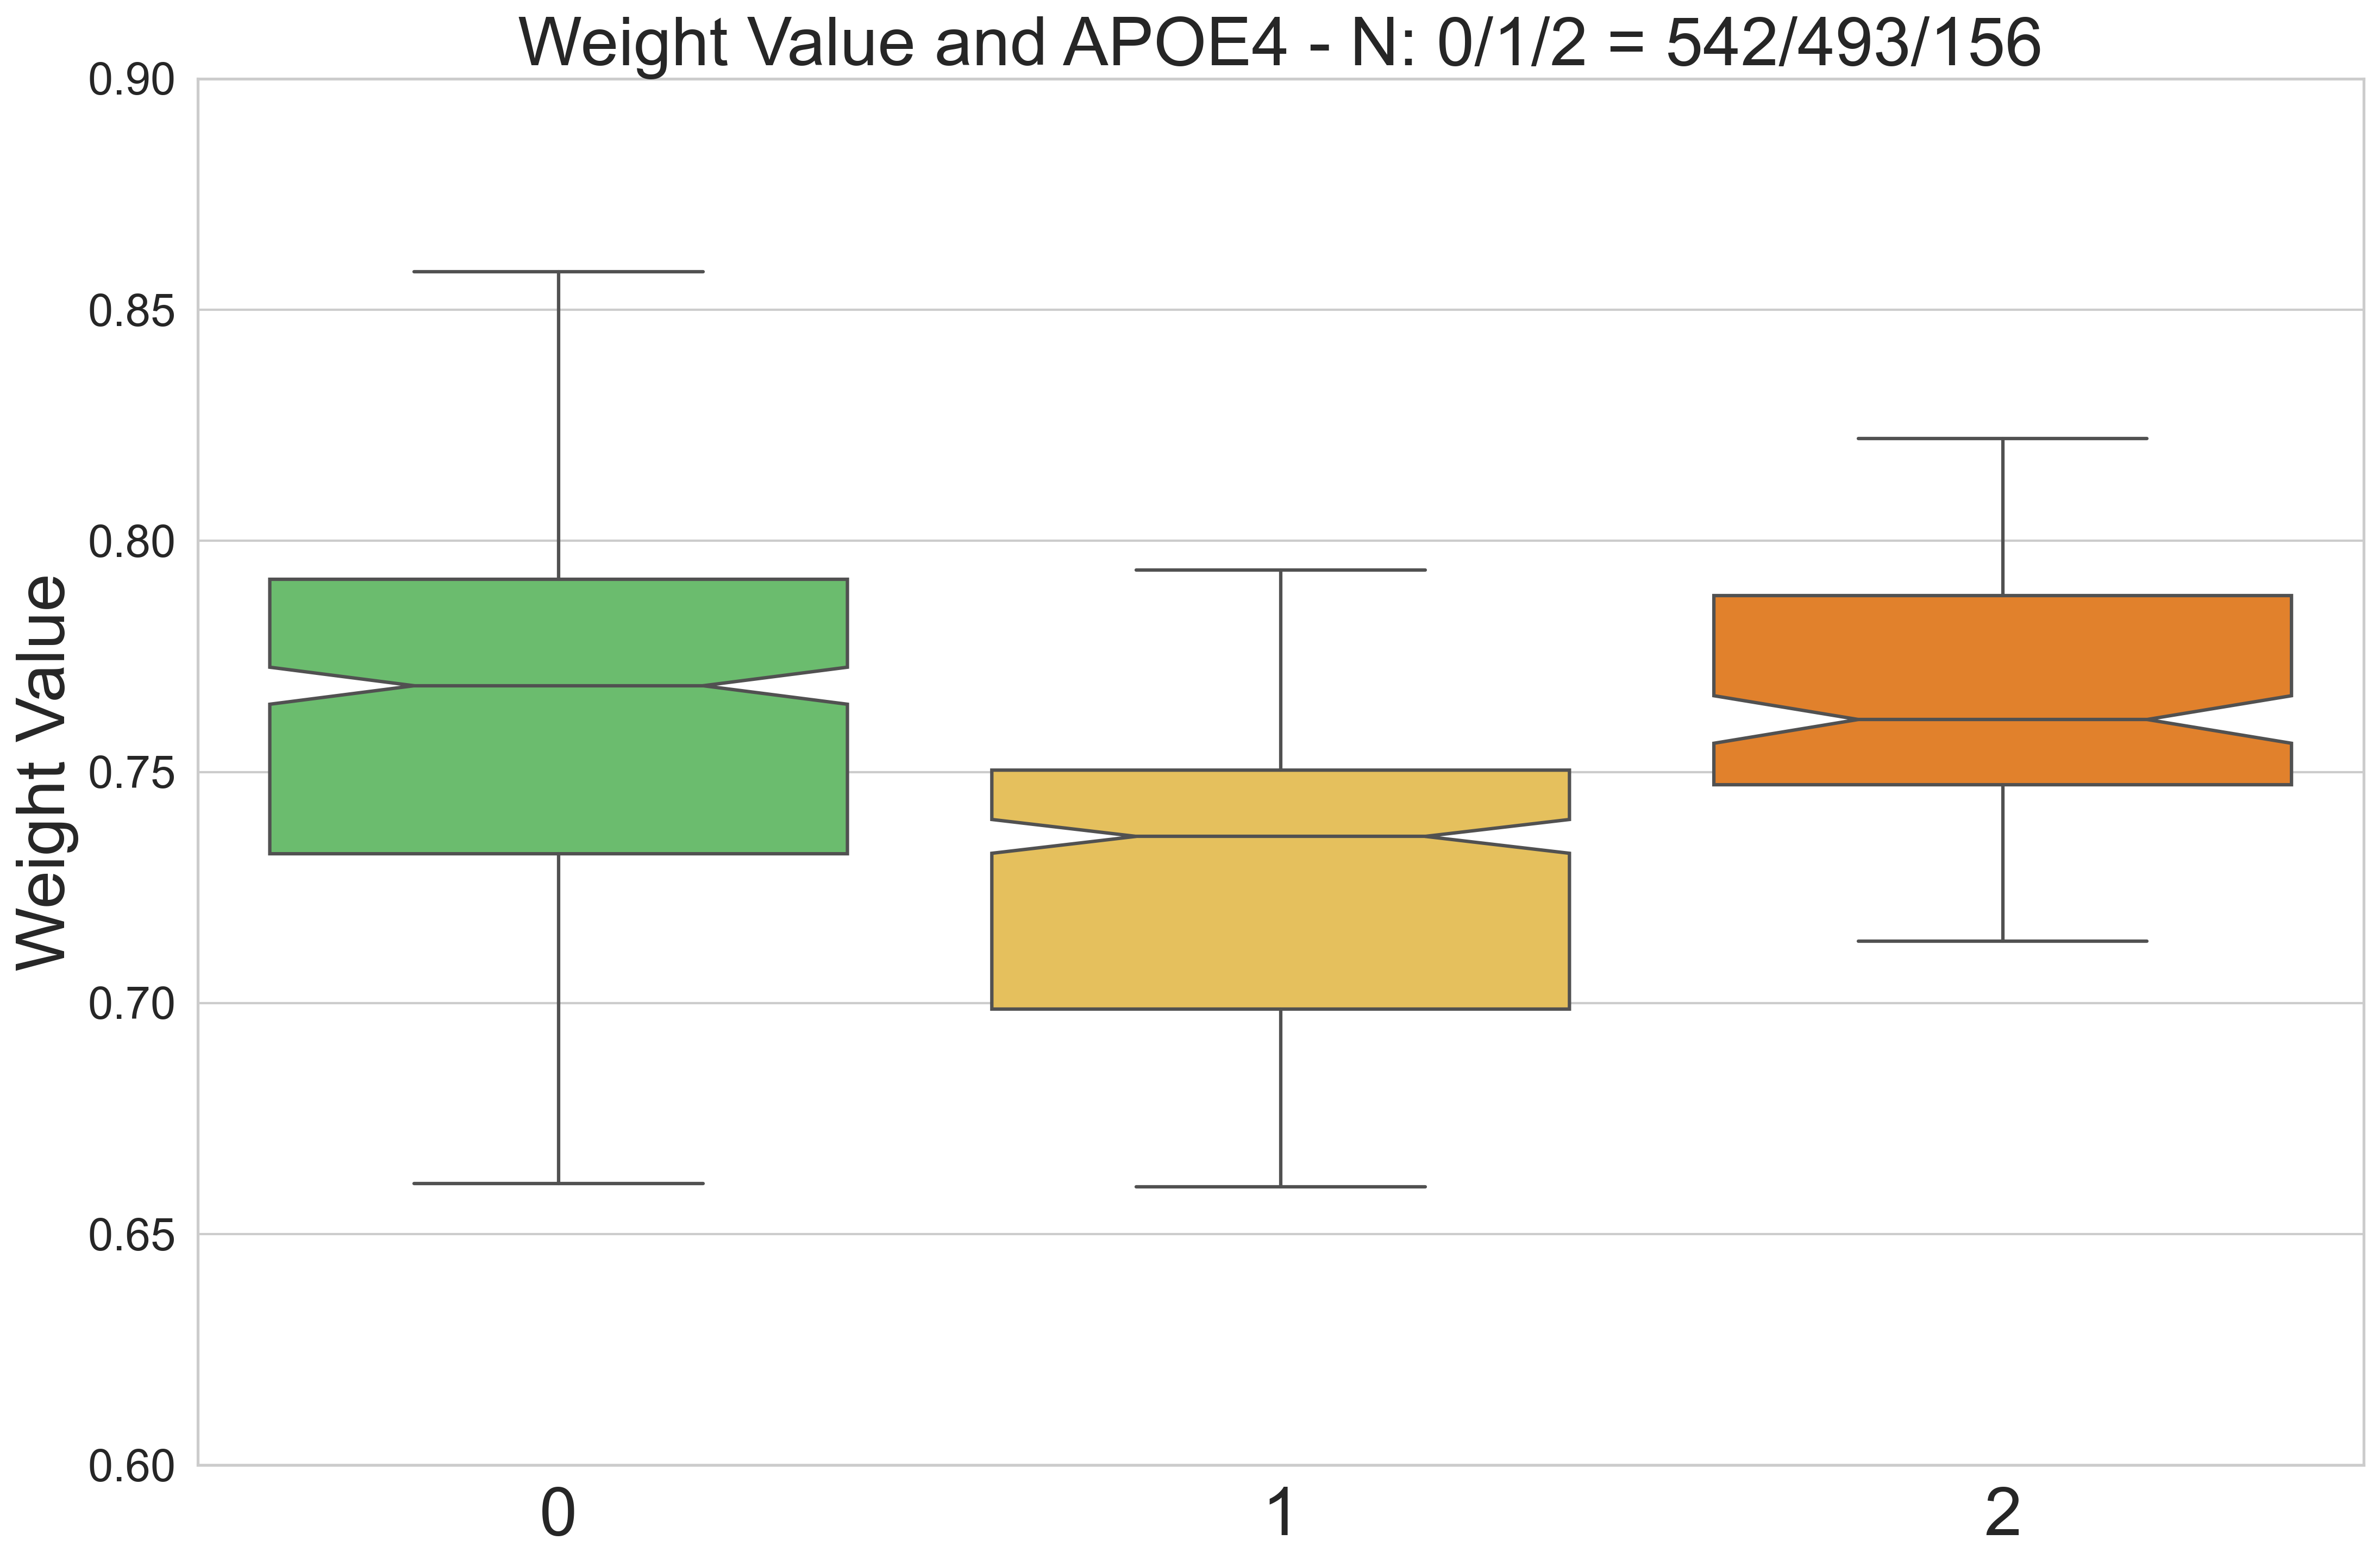

In [227]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

input_data_feats = pd.read_csv("adni_processed_2_28.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_feats = input_data_feats[['subject', 'DX']]

input_data_feats = input_data_feats[input_data_feats["DX"].isin(["MCI", "Dementia"])]

input_data_feats['DX'] = input_data_feats.DX.map({'MCI':0, 'Dementia':1})

input_data_feats['DX'] = input_data_feats['DX'].astype(int)

input_data = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

merged = pd.merge(input_data, input_data_feats, on='subject')

t_stat, p_value = ttest_ind(merged[merged['APOE4_y'] == 1]['weight_val'], 
                                merged[merged['APOE4_y'] == 2]['weight_val'], alternative='two-sided')

print(f'T-test: {p_value}')

U, p_value = mannwhitneyu(merged[merged['APOE4_y'] == 1]['weight_val'], 
                                merged[merged['APOE4_y'] == 2]['weight_val'])

print(f'Mann-whitney: {p_value}')

# Calculate the balanced accuracy for each cluster
balanced_accuracy = merged.groupby('APOE4_y').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['APOE4_y', 'balanced_accuracy']
control_trauma = len(merged[merged['APOE4_y']==0])
positive_trauma = len(merged[merged['APOE4_y']==1])
positive_2_trauma = len(merged[merged['APOE4_y']==2])
print(balanced_accuracy)
print(f'0: {control_trauma}')
print(f'1: {positive_trauma}')
print(f'2: {positive_2_trauma}')

# Create a boxplot with notches
plt.figure(figsize=(15, 10), dpi=300)
box_plot = sns.boxplot(x="APOE4_y", y="weight_val", data=merged, palette=['#5ec962', '#fcca46', 'tab:orange'], notch=True)

# Set the title and labels
plt.title(f'Weight Value and APOE4 - N: 0/1/2 = {control_trauma}/{positive_trauma}/{positive_2_trauma}', fontsize=30)
plt.xlabel('', fontsize=30)
plt.ylabel('Weight Value', fontsize=30)

# Move the legend to an empty space
# plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

new_labels = ["0", "1", "2"] 
box_plot.set_xticklabels(new_labels, fontsize=30)
box_plot.set_ylim(0.60,0.9)
plt.yticks(fontsize=20)
# Display the plot
plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots/boxplot_weights_bacc_adni_mci_ad_apoe4_smaller_range_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()


T-test: 3.775006045739578e-67
Mann-whitney: 5.0136042062351716e-55
  PTGENDER  balanced_accuracy
0   Female           0.705026
1     Male           0.636396
0: 503
1: 688


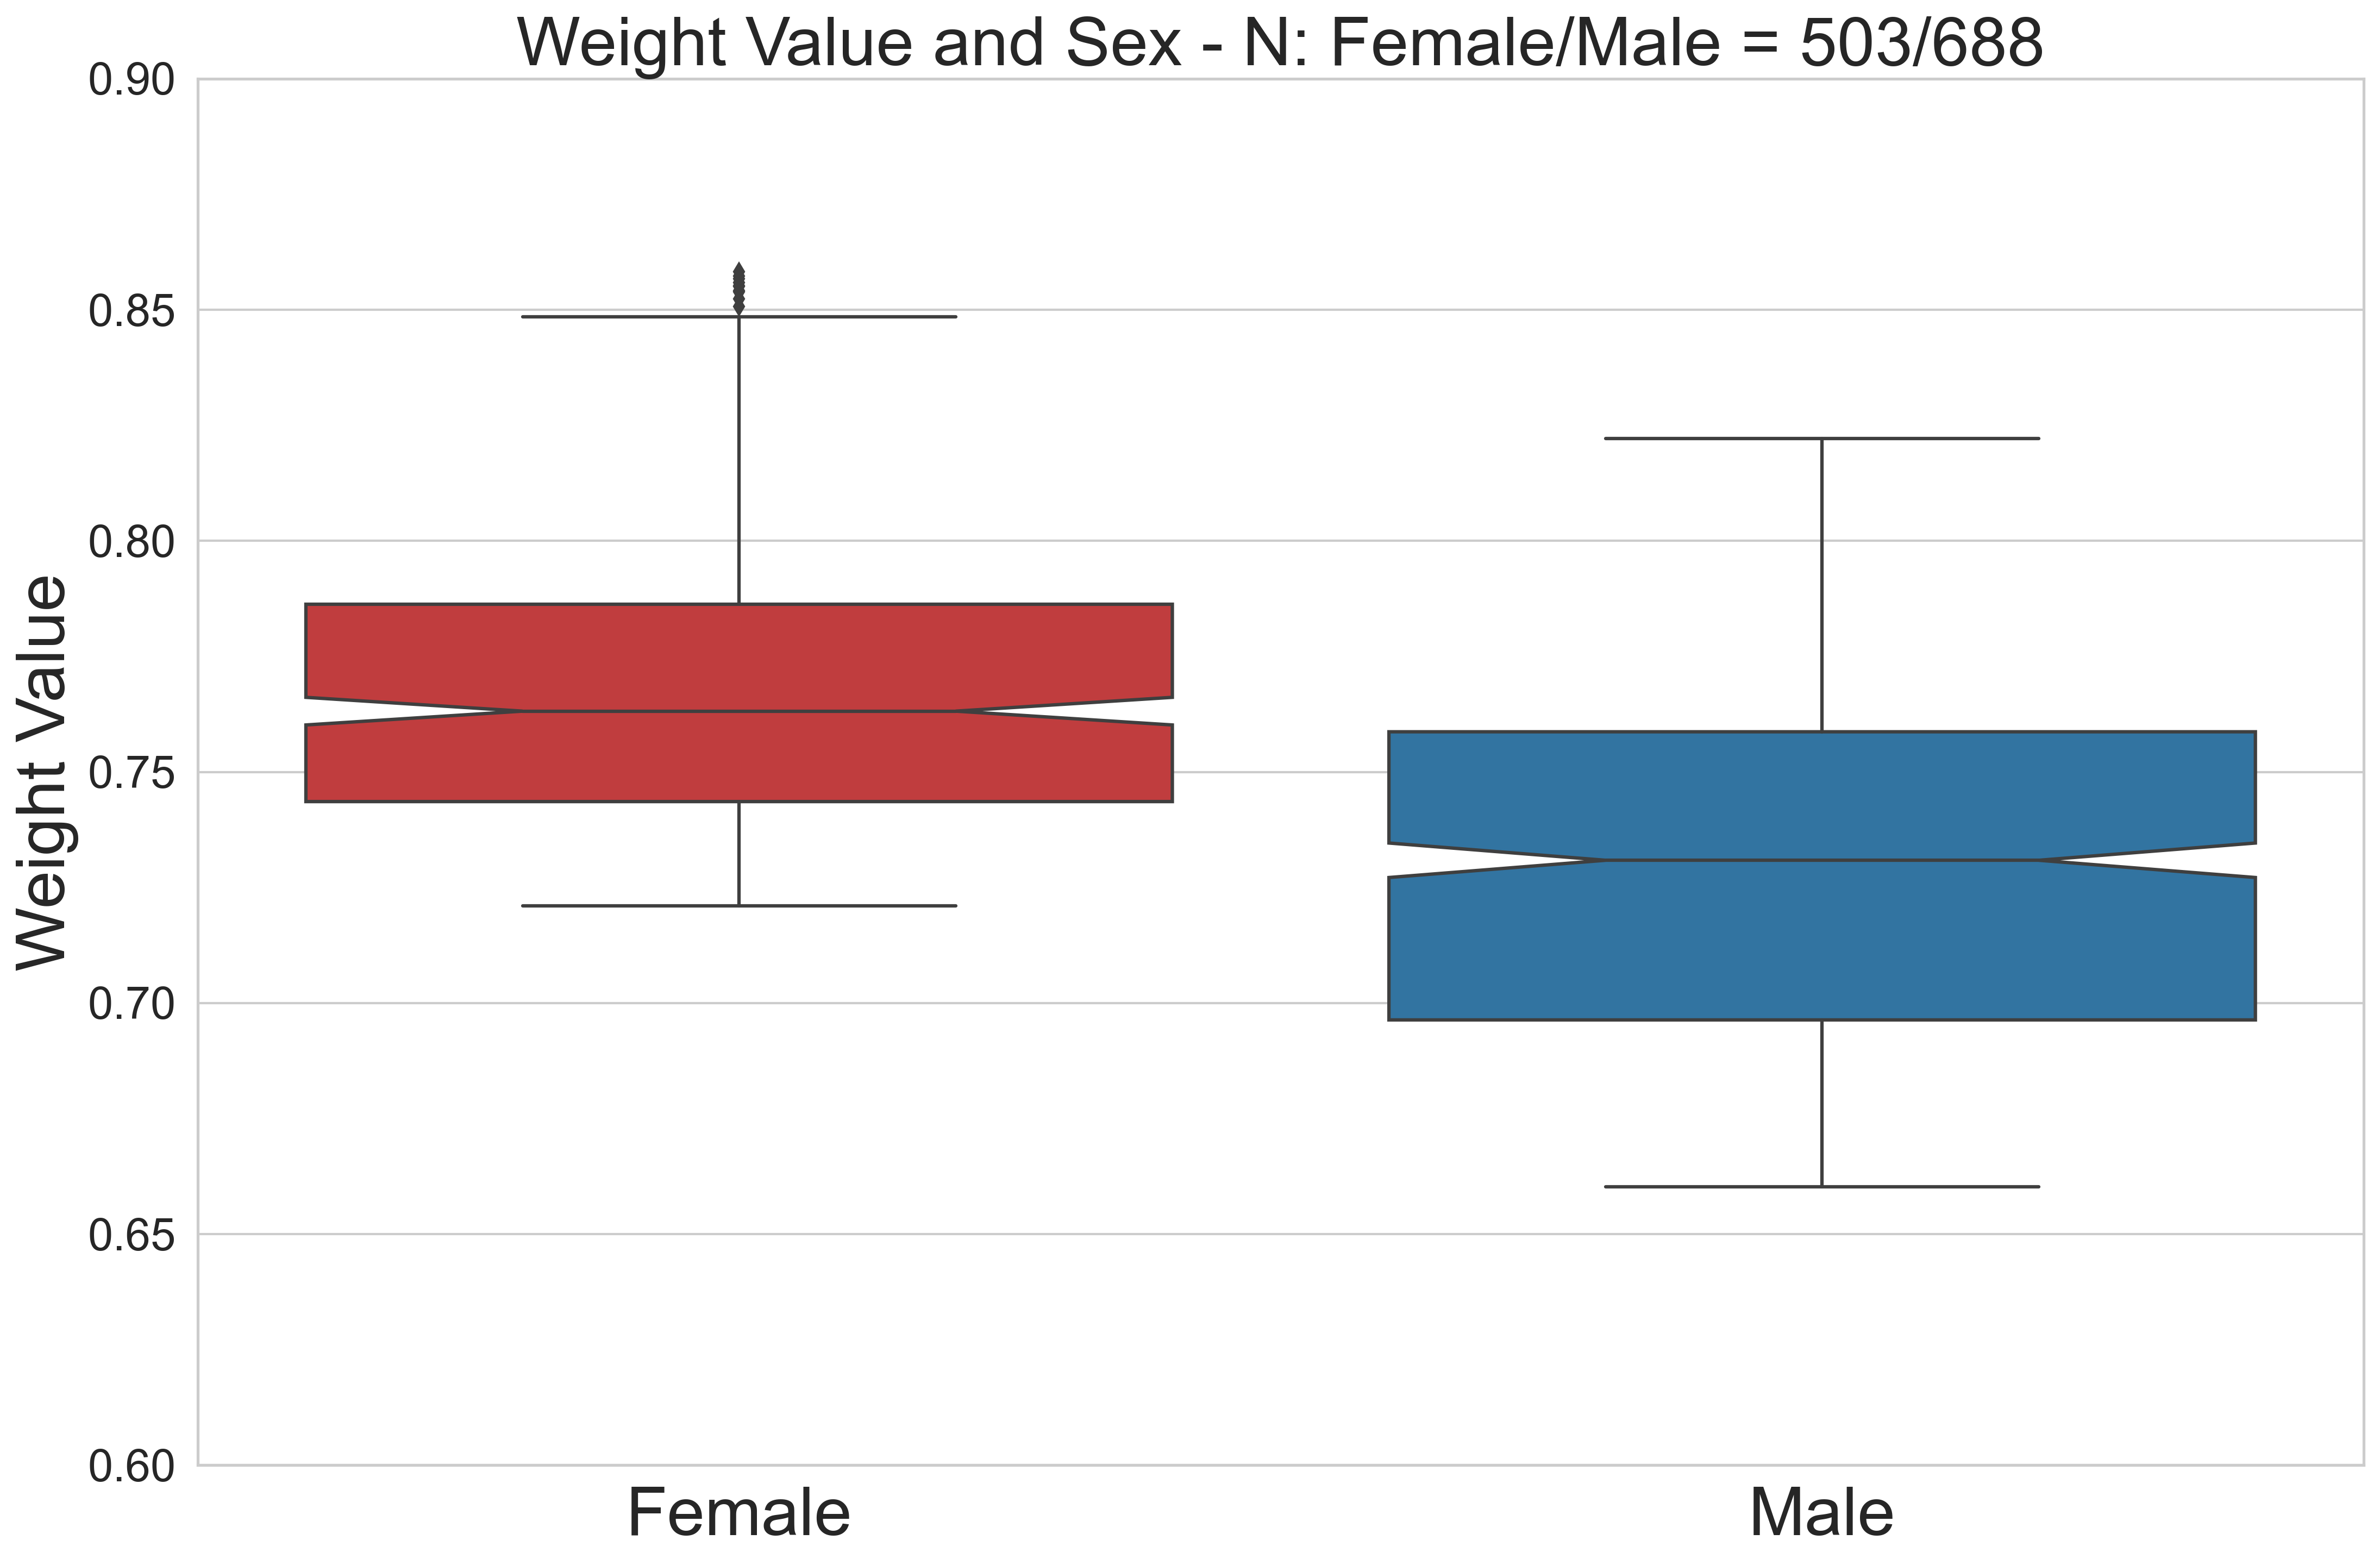

In [233]:
from scipy.stats import ttest_ind

input_data_feats = pd.read_csv("adni_processed_2_28.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_feats = input_data_feats[['subject', 'DX']]

input_data_feats = input_data_feats[input_data_feats["DX"].isin(["MCI", "Dementia"])]

input_data_feats['DX'] = input_data_feats.DX.map({'MCI':0, 'Dementia':1})

input_data_feats['DX'] = input_data_feats['DX'].astype(int)

input_data = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

merged = pd.merge(input_data, input_data_feats, on='subject')

t_stat, p_value = ttest_ind(merged[merged['PTGENDER'] == 'Male']['weight_val'], 
                                merged[merged['PTGENDER'] == 'Female']['weight_val'], alternative='two-sided')

print(f'T-test: {p_value}')

U, p_value = mannwhitneyu(merged[merged['PTGENDER'] == 'Male']['weight_val'], 
                                merged[merged['PTGENDER'] == 'Female']['weight_val'])

print(f'Mann-whitney: {p_value}')

# Calculate the balanced accuracy for each cluster
balanced_accuracy = merged.groupby('PTGENDER').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['PTGENDER', 'balanced_accuracy']
control_trauma = len(merged[merged['PTGENDER']=='Female'])
positive_trauma = len(merged[merged['PTGENDER']=='Male'])
print(balanced_accuracy)
print(f'0: {control_trauma}')
print(f'1: {positive_trauma}')

# Create a boxplot with notches
plt.figure(figsize=(15, 10), dpi=300)
box_plot = sns.boxplot(x="PTGENDER", y="weight_val", data=merged, order=['Female', 'Male'], palette=['tab:red', 'tab:blue'], notch=True)

# Set the title and labels
plt.title(f'Weight Value and Sex - N: Female/Male = {control_trauma}/{positive_trauma}', fontsize=30)
plt.xlabel('', fontsize=30)
plt.ylabel('Weight Value', fontsize=30)

# Move the legend to an empty space
# plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

new_labels = ["Female", "Male"] 
box_plot.set_xticklabels(new_labels, fontsize=30)
box_plot.set_ylim(0.60,0.9)
plt.yticks(fontsize=20)
# Display the plot
plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots/boxplot_weights_bacc_adni_mci_ad_sex_smaller_range_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()


T-test: 1.0287292944979287e-06
Mann-whitney: 1.1886988746339152e-07
  Age_binned  balanced_accuracy
0          0           0.734517
1          1           0.670461
2          2           0.605888
0: 395
1: 394
2: 402


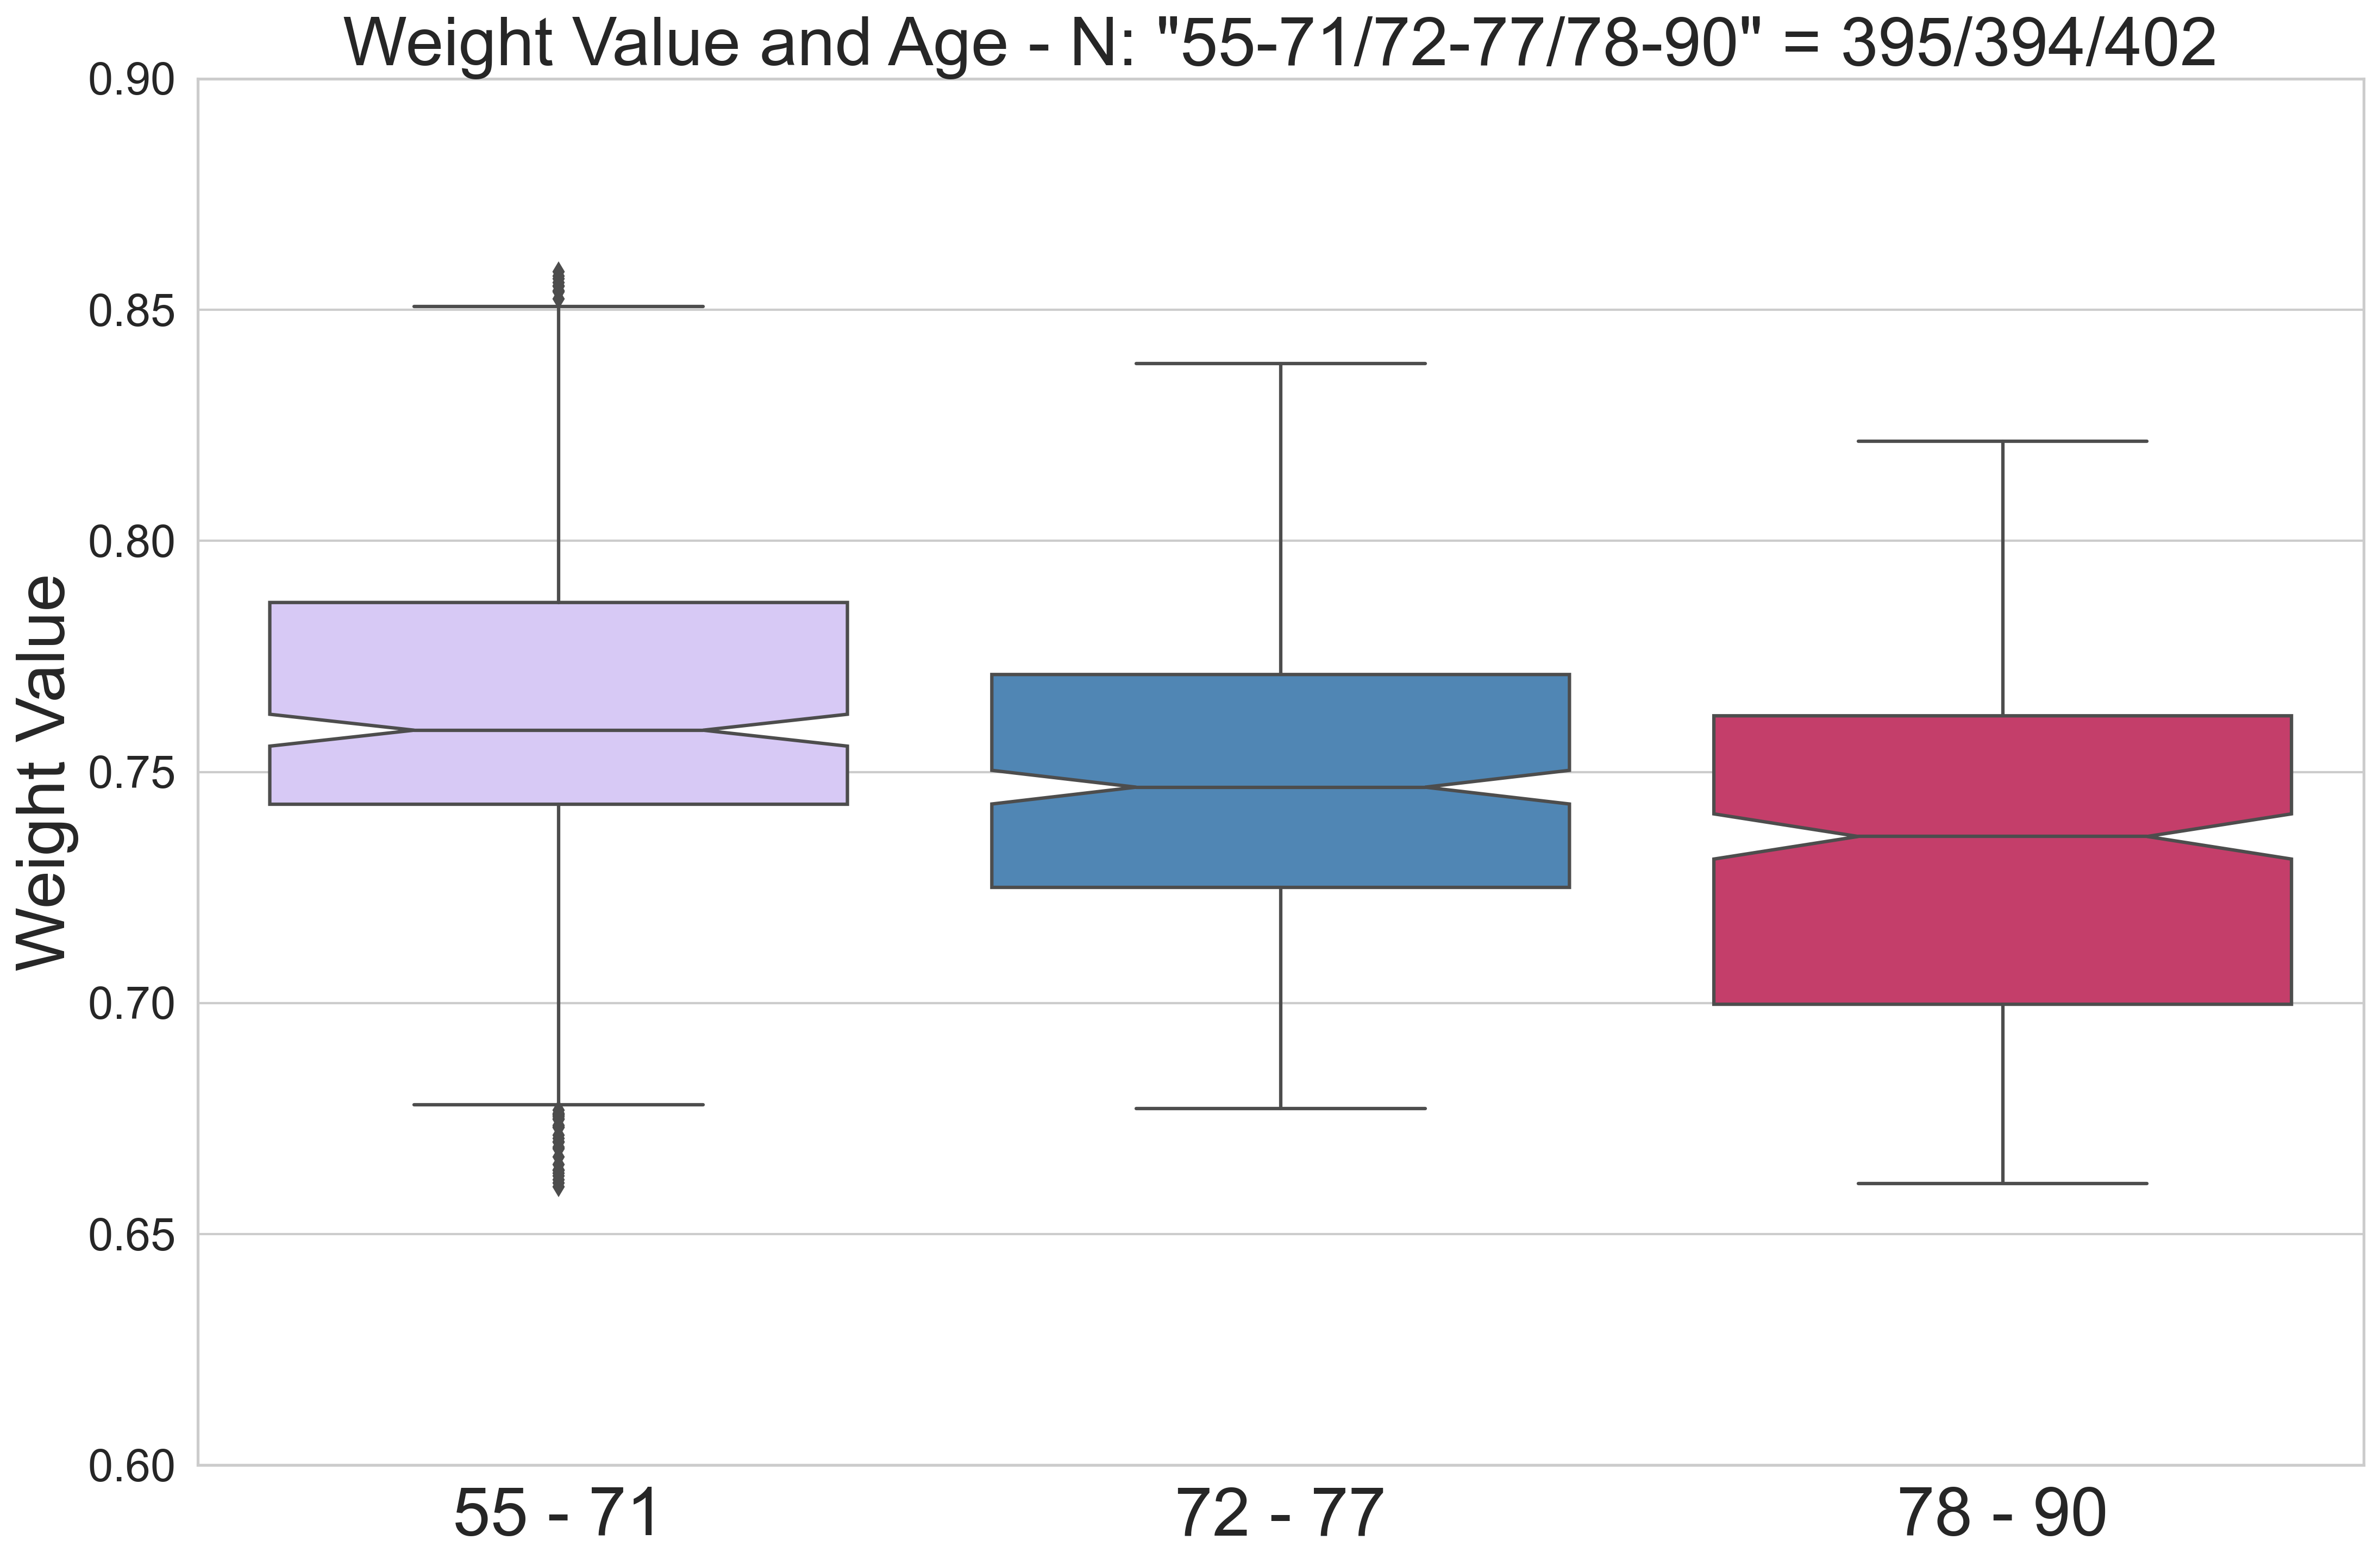

Category 0: Age range 55.0 - 71.0
Category 1: Age range 71.1 - 77.6
Category 2: Age range 77.62 - 94.91


In [236]:
from scipy.stats import ttest_ind

input_data_feats = pd.read_csv("adni_processed_2_28.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_feats = input_data_feats[['subject', 'DX']]

input_data_feats = input_data_feats[input_data_feats["DX"].isin(["MCI", "Dementia"])]

input_data_feats['DX'] = input_data_feats.DX.map({'MCI':0, 'Dementia':1})

input_data_feats['DX'] = input_data_feats['DX'].astype(int)

input_data = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

merged = pd.merge(input_data, input_data_feats, on='subject')

merged["Age_binned"] = pd.qcut(merged['AGE_visit_y'], q=[0, .33, .66, 1], labels=bin_labels_5)

t_stat, p_value = ttest_ind(merged[merged['Age_binned'] == 1]['weight_val'], 
                                merged[merged['Age_binned'] == 2]['weight_val'], alternative='two-sided')


print(f'T-test: {p_value}')

U, p_value = mannwhitneyu(merged[merged['Age_binned'] == 1]['weight_val'], 
                                merged[merged['Age_binned'] == 2]['weight_val'])

print(f'Mann-whitney: {p_value}')

# Calculate the balanced accuracy for each cluster
balanced_accuracy = merged.groupby('Age_binned').apply(lambda x: balanced_accuracy_score(x['Labels'], x['Prediction'])).reset_index()
balanced_accuracy.columns = ['Age_binned', 'balanced_accuracy']
control_trauma = len(merged[merged['Age_binned']==0])
positive_trauma = len(merged[merged['Age_binned']==1])
positive_2_trauma = len(merged[merged['Age_binned']==2])
print(balanced_accuracy)
print(f'0: {control_trauma}')
print(f'1: {positive_trauma}')
print(f'2: {positive_2_trauma}')

# Create a boxplot with notches
plt.figure(figsize=(15, 10), dpi=300)
box_plot = sns.boxplot(x="Age_binned", y="weight_val", data=merged, order=[0,1,2], palette=['#D4C2FC', '#3F88C5', '#DB2763'], notch=True)

# Set the title and labels
plt.title(f'Weight Value and Age - N: "55-71/72-77/78-90" = {control_trauma}/{positive_trauma}/{positive_2_trauma}', fontsize=30)
plt.xlabel('', fontsize=30)
plt.ylabel('Weight Value', fontsize=30)

# Move the legend to an empty space
# plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

new_labels = ["55 - 71", "72 - 77", "78 - 90"] 
box_plot.set_xticklabels(new_labels, fontsize=30)
box_plot.set_ylim(0.60,0.9)
plt.yticks(fontsize=20)
# Display the plot
plt.tight_layout()

# Saving the updated plot
modern_plot_path = './plots/boxplot_weights_bacc_adni_mci_ad_age_smaller_range_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
plt.show()

# Group the DataFrame by the 'category' column and for each group, find the minimum and maximum 'age'
age_ranges = merged.groupby('Age_binned')['AGE_visit_y'].agg(['min', 'max'])

# Print the age range for each category
for category, data in age_ranges.iterrows():
    print(f"Category {category}: Age range {data['min']} - {data['max']}")

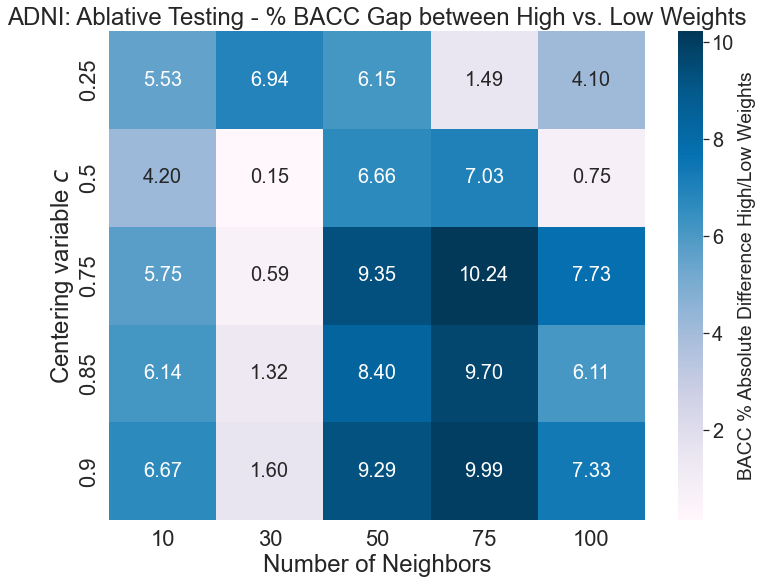

In [209]:
# Let's combine all the steps into one block of code that generates the above plot.

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extracted data from the image provided by the user
# The data is structured as a dictionary with tuples as keys
# Tuples are structured as (Centering value, Number of Neighbors)
data = {
    (0.25, 10): (0.687, 0.649), (0.25, 30): (0.634, 0.678),
    (0.25, 50): (0.634, 0.673), (0.25, 75): (0.669, 0.659),
    (0.25, 100): (0.658, 0.685), (0.5, 10): (0.690, 0.661),
    (0.5, 30): (0.676, 0.675), (0.5, 50): (0.646, 0.689),
    (0.5, 75): (0.697, 0.648), (0.5, 100): (0.668, 0.673),
    (0.75, 10): (0.696, 0.656), (0.75, 30): (0.676, 0.672),
    (0.75, 50): (0.642, 0.702), (0.75, 75): (0.723, 0.649),
    (0.75, 100): (0.647, 0.697), (0.85, 10): (0.700, 0.657),
    (0.85, 30): (0.681, 0.672), (0.85, 50): (0.643, 0.697),
    (0.85, 75): (0.722, 0.652), (0.85, 100): (0.655, 0.695),
    (0.9, 10): (0.705, 0.658), (0.9, 30): (0.686, 0.675),
    (0.9, 50): (0.646, 0.706), (0.9, 75): (0.721, 0.649),
    (0.9, 100): (0.655, 0.703)
}

sns.set(font_scale=1.6)

# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(data.items()), columns=['Index', 'Values'])
df[['Centering', 'Neighbors']] = pd.DataFrame(df['Index'].tolist(), index=df.index)
df[['BACC > c', 'BACC < c']] = pd.DataFrame(df['Values'].tolist(), index=df.index)
df.drop(columns=['Index', 'Values'], inplace=True)

# Calculate the absolute difference and percentage difference
df['Absolute Difference'] = abs(df['BACC > c'] - df['BACC < c'])
df['Percentage Difference'] = (df['Absolute Difference'] / df['BACC > c']) * 100

# Pivot the DataFrame to create a matrix suitable for a heatmap of percentage differences
percentage_heatmap_data = df.pivot("Centering", "Neighbors", "Percentage Difference")

# Create the heatmap using seaborn with a diverging color map
plt.figure(figsize=(12, 9))
ax = sns.heatmap(percentage_heatmap_data, annot=True, fmt=".2f",
                 cmap='PuBu', cbar_kws={'label': 'BACC % Absolute Difference High/Low Weights'},
                 annot_kws={'size': 20}) #RdYlGn
plt.title('ADNI: Ablative Testing - % BACC Gap between High vs. Low Weights', fontsize=24)
plt.ylabel('Centering variable $c$', fontsize=24)
plt.xlabel('Number of Neighbors', fontsize=24)

ax.tick_params(labelsize=22)

# Set the color bar font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

modern_plot_path = './plots/heatmap_bacc_adni_mci_ad_age_blues.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=300)
# Display the heatmap
plt.show()

# This code block combines data extraction, transformation, percentage calculation, and visualization into one.


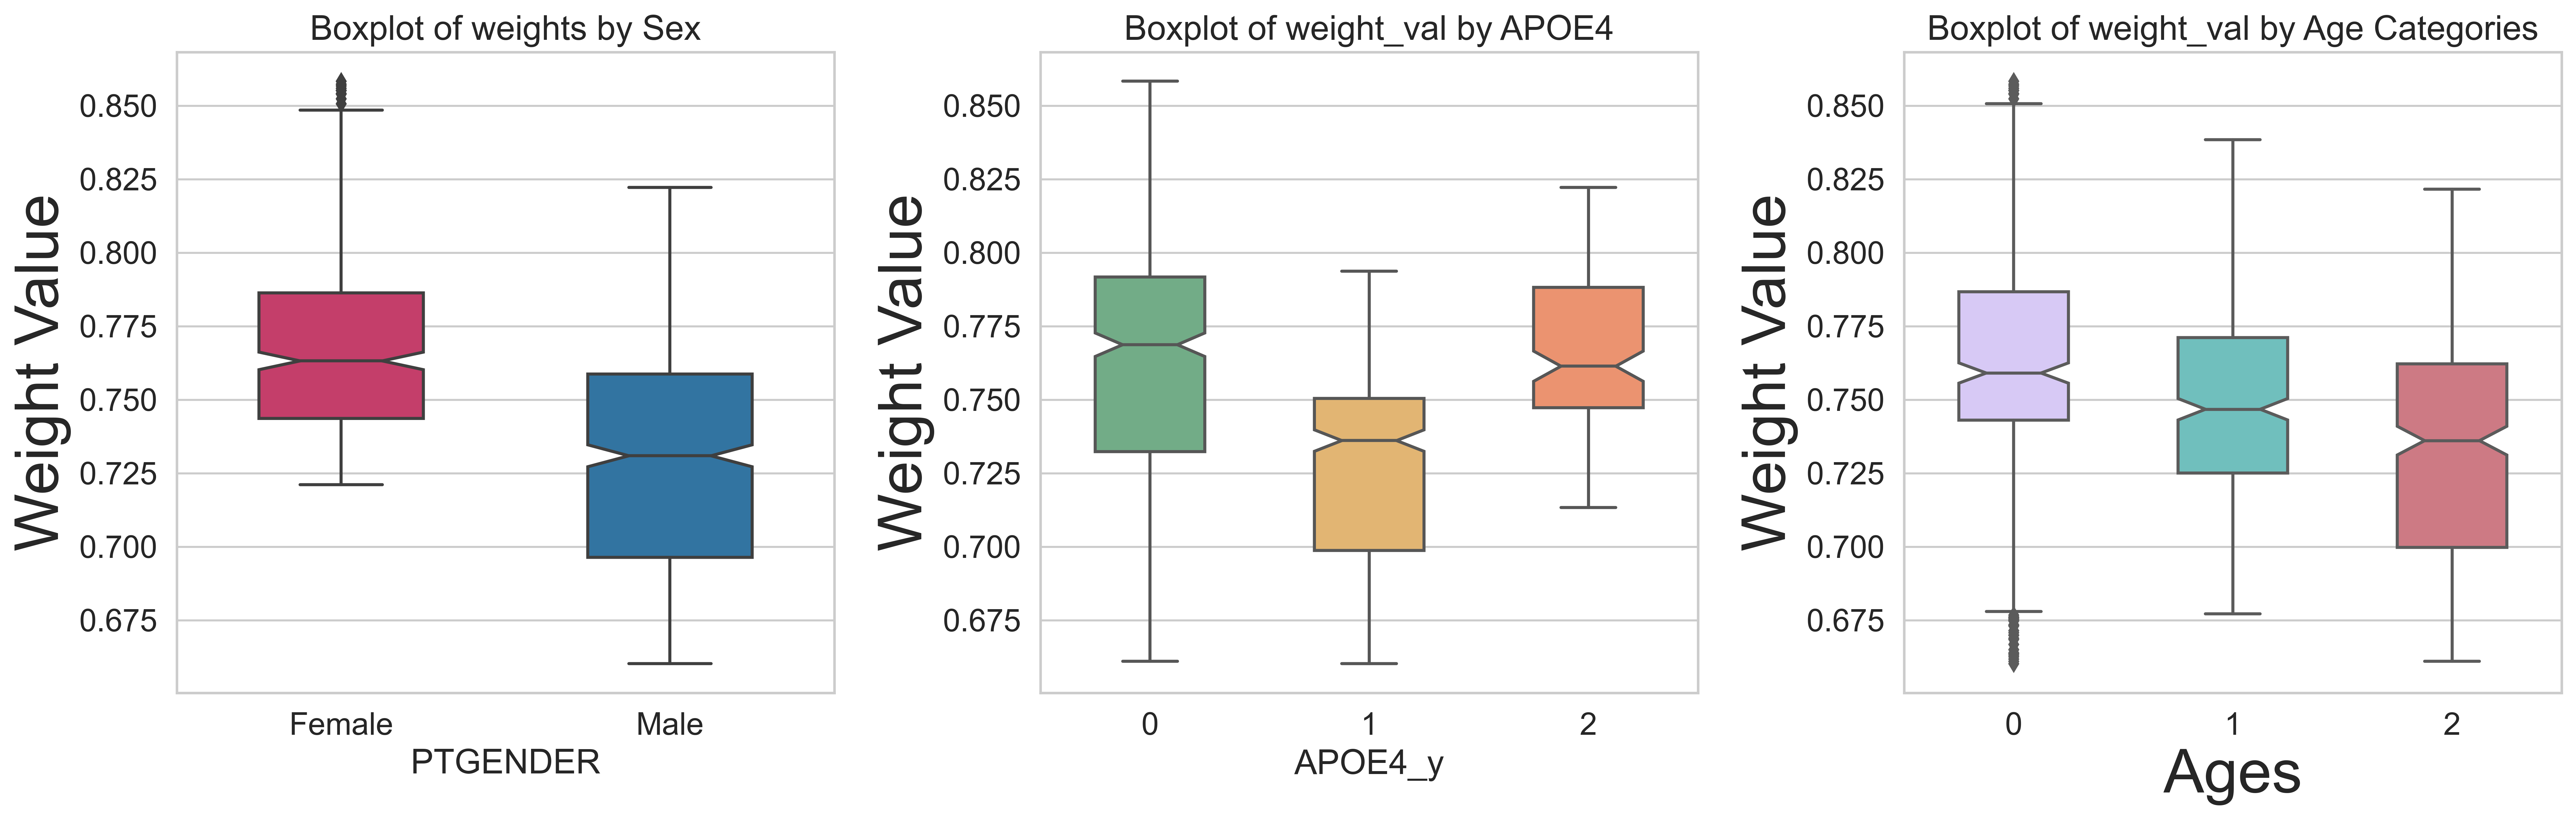

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame after all preprocessing steps
input_data_feats = pd.read_csv("adni_processed_2_28.csv")
input_data_feats = input_data_feats.drop_duplicates(subset='subject', keep='last')

input_data_feats = input_data_feats[['subject', 'DX']]

input_data_feats = input_data_feats[input_data_feats["DX"].isin(["MCI", "Dementia"])]

input_data_feats['DX'] = input_data_feats.DX.map({'MCI':0, 'Dementia':1})

input_data_feats['DX'] = input_data_feats['DX'].astype(int)

input_data = pd.read_csv("./merged_data_adni_for_plots_75_0.75_7.csv")

data = pd.merge(input_data, input_data_feats, on='subject')

data["Age_binned"] = pd.qcut(data['AGE_visit_y'], q=[0, .33, .66, 1], labels=bin_labels_5)

# Adjust matplotlib parameters for font size and figure resolution
plt.figure(figsize=(18, 6), dpi=500)
plt.rcParams.update({'font.size': 20})

# Define the color palettes for each category
gender_colors = ['#DB2763', 'tab:blue']  # Colors for PTGENDER
apoe4_colors = ['#68B684', '#F4B860', '#FF8A5B']  # Colors for APOE4_y
age_colors = ['#D4C2FC', '#63CCCA', '#DB6C79']  # Colors for Age_binned

# PTGENDER with Females first
plt.subplot(1, 3, 1)
sns.boxplot(x='PTGENDER', y='weight_val', data=data, order=['Female', 'Male'], palette=gender_colors, width=0.5, notch=True)
plt.title('Boxplot of weights by Sex')
plt.ylabel('Weight Value', fontsize=30)

# APOE4_y
plt.subplot(1, 3, 2)
sns.boxplot(x='APOE4_y', y='weight_val', data=data, palette=apoe4_colors, width=0.5, notch=True)
plt.title('Boxplot of weight_val by APOE4')
plt.ylabel('Weight Value', fontsize=30)

# Age_binned
plt.subplot(1, 3, 3)
sns.boxplot(x='Age_binned', y='weight_val', data=data, palette=age_colors, width=0.5, notch=True)
plt.title('Boxplot of weight_val by Age Categories')
plt.xlabel('Ages', fontsize=30)
plt.ylabel('Weight Value', fontsize=30)

plt.tight_layout()
modern_plot_path = './plots/boxplots_weights_groups_adni_mci_ad_75_0.75_7.png'
plt.savefig(modern_plot_path, bbox_inches='tight', dpi=500)
# Display the heatmap
plt.show()
